# I. Introduction

### 1. Domain-specific area
The domain-specific area that we will be using is based off the used car market in the UK. The used vehicle market is a huge market as many people often prefer to buy a second hand vehicle in a good condition at a much cheaper price as compared to a brand new one, especially if the model has been out for a long period of time. For instance, in Singapore alone, the market for used car was valued at USD 40.03 billion in 2021 (https://www.mordorintelligence.com/industry-reports/singapore-used-car-market). The approach in this project can be extended to other types of vehicles such as motorbikes. In a less developed countries such as Malaysia, India, Philippines and the like, you can expect a high market for used motorbikes. 
We choose this domain-specific area as there is a rise in personal vehicles purchases due to the covid pandemic, although the weekly mileage has been reduced for those whom work from home, the security of reducing risk of infection through public transport would make people to be more inclined in using private cars. This project would therefore aid those who seeks to purchase used car by giving them an informed analysis on used car prices.

### 2. Dataset
A suitable dataset we will explore is of a used Ford car dataset in the UK, it is collected by scraping car data listings, providing information about the Ford car being sold. The dataset can be accessed via the Kaggle official website. The dataset is made of 17965 datas of used car listing for the Ford brand. It is in CSV and contains columns:
1. model, of object type, a nominal variable
2. year, of integer type, an interval variable
3. price, of integer type, a ratio variable
4. transmission, of object type, a nominal variable
5. mileage, of integer type, a ratio variable
6. fuelType, of object type, a nominal variable
7. tax, of integer type, a ratio variable
8. mpg, of float type, a ratio variable
9. engineSize, of float type, a ratio variable

### 3. Objectives of the project
Objectives:
1. To explore used Ford car dataset in the UK and identify relationships between the various features against the car prices.
2. Develop a highly accurate prediction of used Ford car prices using machine learning models. 
3. Compare the performance of different machine learning algorithms, specifically linear regression and random forest and determine the best approach in predicting the car prices.

Contributions:
1. Exploring the relationship between the prices of used cars and other relevant features, such as model year, transmission, mileage, fuel type, and tax, can help policymakers and regulators understand how these factors affect the prices of used cards.
2. An accurate predictive model for the used car prices can help stakeholders to make more informed decision about buying or selling used cars. An indirect stakeholder can also be car rentals, they may be able to set a more competitive rental prices for their customer based off the rented car's predicted value. Machine learning can help to better predict these prices more accurately, other features of the dataset such as demand forecasts can also be found using machine learning. 
3. Comparing the performance of different machine learning algorithms can help others exploring the field of machine learning understand which algorithms are most effective for predicting used vehicle prices as most other datasets related to vehicles has similar features as cars, which therefore can help them improve the performance of their models.

# II. Implementation / Coding

### 4. Convert/store the dataset locally and preprocess the data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

It is a CSV file so we will use pandas's function read_csv to read the file.

In [2]:
# Convert/store the dataset locally
df = pd.read_csv('./ford.csv')

# Display first 10 rows
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [3]:
# Info about size of dataframe
df.shape

(17965, 9)

In [4]:
# Detailed info about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Preprocessing steps:

As seen in df.info(), there is no missing data, hence there is no need to process the data for missing values.

In [5]:
# drop dataset with car year > 2023 as it is not possible and most likely an error
df = df[df.year < 2023]
df.year.describe()

count    17964.000000
mean      2016.864173
std          2.024987
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2020.000000
Name: year, dtype: float64

In [6]:
# We check for duplicates as there is possibility that the same listing of the same car is put up twice by different people/accounts
duplicates = df.duplicated(subset=['model','year', 'price','transmission', 'mileage','fuelType', 'tax', 'mpg','engineSize'])

# Remove duplicates from dataframe
df = df[~duplicates]

# Check our dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17810 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17810 non-null  object 
 1   year          17810 non-null  int64  
 2   price         17810 non-null  int64  
 3   transmission  17810 non-null  object 
 4   mileage       17810 non-null  int64  
 5   fuelType      17810 non-null  object 
 6   tax           17810 non-null  int64  
 7   mpg           17810 non-null  float64
 8   engineSize    17810 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [7]:
df.year.describe()

count    17810.000000
mean      2016.860079
std          2.026487
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2020.000000
Name: year, dtype: float64

One-Hot encoding

In [8]:
df.model.unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo'], dtype=object)

In [9]:
#Show the mode of the car model
modelCounts = df.model.value_counts() 
modelCounts

 Fiesta                   6508
 Focus                    4555
 Kuga                     2208
 EcoSport                 1127
 C-MAX                     542
 Ka+                       523
 Mondeo                    512
 B-MAX                     350
 S-MAX                     294
 Grand C-MAX               247
 Galaxy                    227
 Edge                      205
 KA                        197
 Puma                       79
 Tourneo Custom             69
 Mustang                    57
 Grand Tourneo Connect      57
 Tourneo Connect            32
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [10]:
len(modelCounts)

23

In [11]:
modelCounts.describe()

count      23.000000
mean      774.347826
std      1605.486038
min         1.000000
25%        44.500000
50%       205.000000
75%       517.500000
max      6508.000000
Name: model, dtype: float64

We can see that the mean count for the model type is 781 with 50% of data frame has a count of 208 or more. Using One-Hot encoding will increase the number of columns by 23 from the model column, this will lead to overfitting due to the high number of features. To tackle this problem, we will group categories with 200 or fewer occurrences as 'others', reducing the number of categories in the model columns.

In [12]:
otherModel = list(modelCounts[modelCounts <= 200].index)
otherModel

[' KA',
 ' Puma',
 ' Tourneo Custom',
 ' Mustang',
 ' Grand Tourneo Connect',
 ' Tourneo Connect',
 ' Fusion',
 ' Streetka',
 ' Ranger',
 ' Escort',
 ' Transit Tourneo']

In [13]:
df['model'] = df['model'].replace(otherModel, ' Others')

In [14]:
df.model.value_counts()

 Fiesta         6508
 Focus          4555
 Kuga           2208
 EcoSport       1127
 C-MAX           542
 Ka+             523
 Others          512
 Mondeo          512
 B-MAX           350
 S-MAX           294
 Grand C-MAX     247
 Galaxy          227
 Edge            205
Name: model, dtype: int64

In [15]:
df.transmission.value_counts()

Manual       15382
Automatic     1353
Semi-Auto     1075
Name: transmission, dtype: int64

No changes need to be made for transmission.

In [16]:
df.fuelType.value_counts()

Petrol      12079
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [17]:
# Here I will categorise electric fuel type into "Other" as there is only 2 of them.
df['fuelType'] = df['fuelType'].replace(['Electric'], 'Other')
df.fuelType.value_counts()

Petrol    12079
Diesel     5706
Hybrid       22
Other         3
Name: fuelType, dtype: int64

In [18]:
# Determine how many extra columns would be created

# Select the object (string) columns
mask = df.dtypes == np.object
categoricalCols = df.columns[mask]


numOhcCols = (df[categoricalCols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
numOhcCols

model           13
fuelType         4
transmission     3
dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
df2 = df.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in numOhcCols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(df2[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    df2 = df2.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    newDat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    nCols = newDat.shape[1]
    colNames = ['_'.join([col, str(x)]) for x in range(nCols)]

    # Create the new dataframe
    newDf = pd.DataFrame(newDat.toarray(), 
                          index=df2.index, 
                          columns=colNames)

    # Append the new data to the dataframe
    df2 = pd.concat([df2, newDf], axis=1)
df2.head(10)

,year,price,mileage,tax,mpg,engineSize,model_0,model_1,model_2,model_3,...,model_10,model_11,model_12,fuelType_0,fuelType_1,fuelType_2,fuelType_3,transmission_0,transmission_1,transmission_2
0,2017,12000,15944,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2018,14000,9083,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2017,13000,12456,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2019,17500,10460,145,40.3,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2019,16500,1482,145,48.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,2015,10500,35432,145,47.9,1.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,2019,22500,2029,145,50.4,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,2017,9000,13054,145,54.3,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,2019,25500,6894,145,42.2,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,2018,10000,48141,145,61.4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
df2.shape

(17810, 26)

### 5. Identify key series of the dataset and provide statistical summary of the data

In [21]:
# Sets the columns that we want to view the central tendencies on
colsCT = ["price", "mileage","tax","mpg","engineSize"]

df2[colsCT].describe()

,price,mileage,tax,mpg,engineSize
count,17810.000000,17810.000000,17810.000000,17810.000000,17810.000000
mean,12270.103481,23380.413532,113.314992,57.909556,1.350640
std,4736.260216,19418.185474,62.030508,10.132632,0.432597
min,495.000000,1.000000,0.000000,20.800000,0.000000
25%,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,11289.500000,18277.000000,145.000000,58.900000,1.200000
75%,15295.000000,31095.250000,145.000000,65.700000,1.500000
max,54995.000000,177644.000000,580.000000,201.800000,5.000000


Here we can see the mean and median(Labelled as 50%) and also the spread.

In [22]:
modePrice = df2['price'].mode()
print("Mode for price: " + str(modePrice[0]))
modeMileage = df2['mileage'].mode()
print("Mode for mileage: " + str(modeMileage[0]))
modeTax = df2['tax'].mode()
print("Mode for tax: " + str(modeTax[0]))
modeMpg = df2['mpg'].mode()
print("Mode for mpg: " + str(modeMpg[0]))
modeEngineSize = df2['engineSize'].mode()
print("Mode for engineSize: " + str(modeEngineSize[0]))

Mode for price: 10000
Mode for mileage: 15000
Mode for tax: 145
Mode for mpg: 65.7
Mode for engineSize: 1.0


From the code we used for one hot encoding, we can also determine the mode for the model of car sold being "Fiesta"

In [23]:
corrMatrix = df.corr()
corrMatrix["price"].sort_values(ascending=False)

price         1.000000
year          0.645221
engineSize    0.411454
tax           0.406075
mpg          -0.346409
mileage      -0.530501
Name: price, dtype: float64

Here we can see the type of distribution for each category against price of the used car.

### 6. Visualise key data series within the dataset by using the appropriate graphs.

<AxesSubplot:xlabel='year', ylabel='engineSize'>

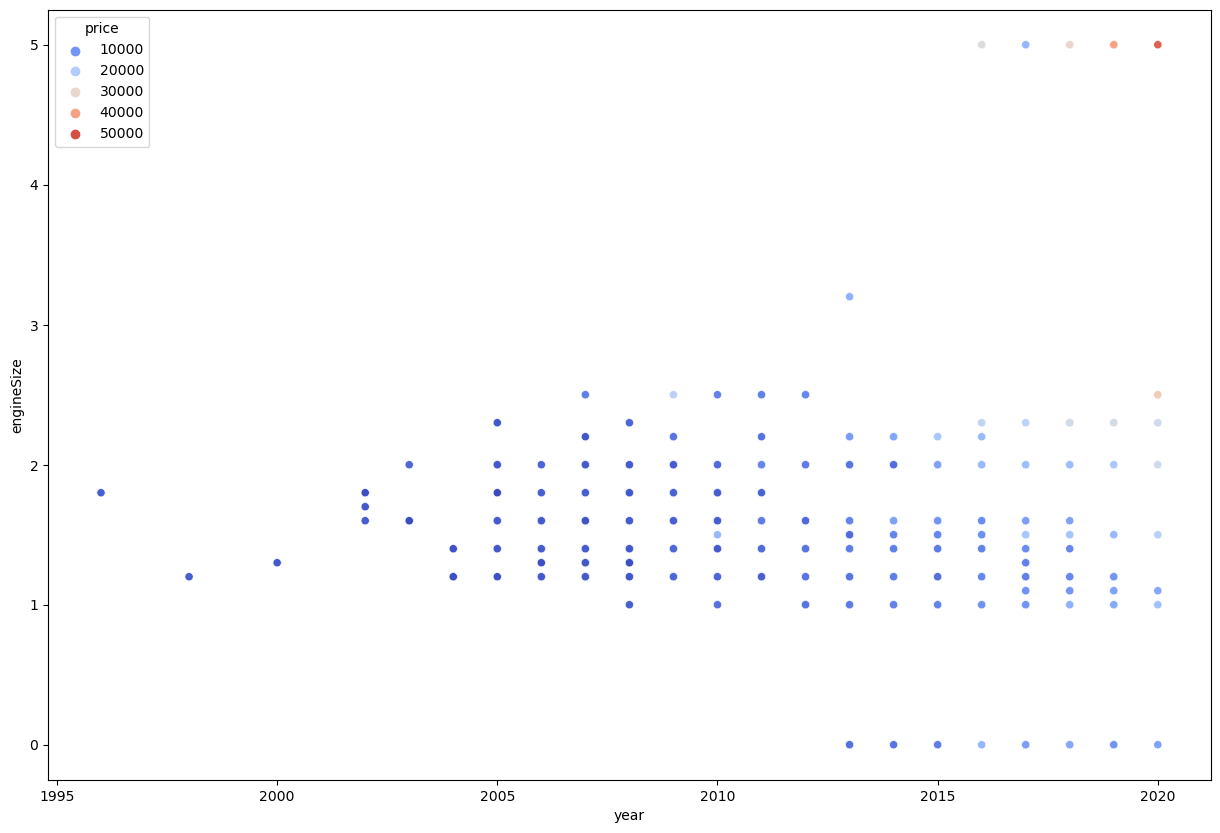

In [24]:
# scatter plot using latitute and longitute vs median_house_value
plt.figure(figsize=(15,10))
sns.scatterplot(x="year", y="engineSize", data=df, hue="price", palette="coolwarm")

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='mileage', ylabel='year'>,
        <AxesSubplot:xlabel='tax', ylabel='year'>,
        <AxesSubplot:xlabel='mpg', ylabel='year'>,
        <AxesSubplot:xlabel='engineSize', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='mileage', ylabel='price'>,
        <AxesSubplot:xlabel='tax', ylabel='price'>,
        <AxesSubplot:xlabel='mpg', ylabel='price'>,
        <AxesSubplot:xlabel='engineSize', ylabel='price'>],
       [<AxesSubplot:xlabel='year', ylabel='mileage'>,
        <AxesSubplot:xlabel='price', ylabel='mileage'>,
        <AxesSubplot:xlabel='mileage', ylabel='mileage'>,
        <AxesSubplot:xlabel='tax', ylabel='mileage'>,
        <AxesSubplot:xlabel='mpg', ylabel='mileage'>,
        <AxesSubplot:xlabel='engineSize', ylabel='mileage'>],
       [<Axes

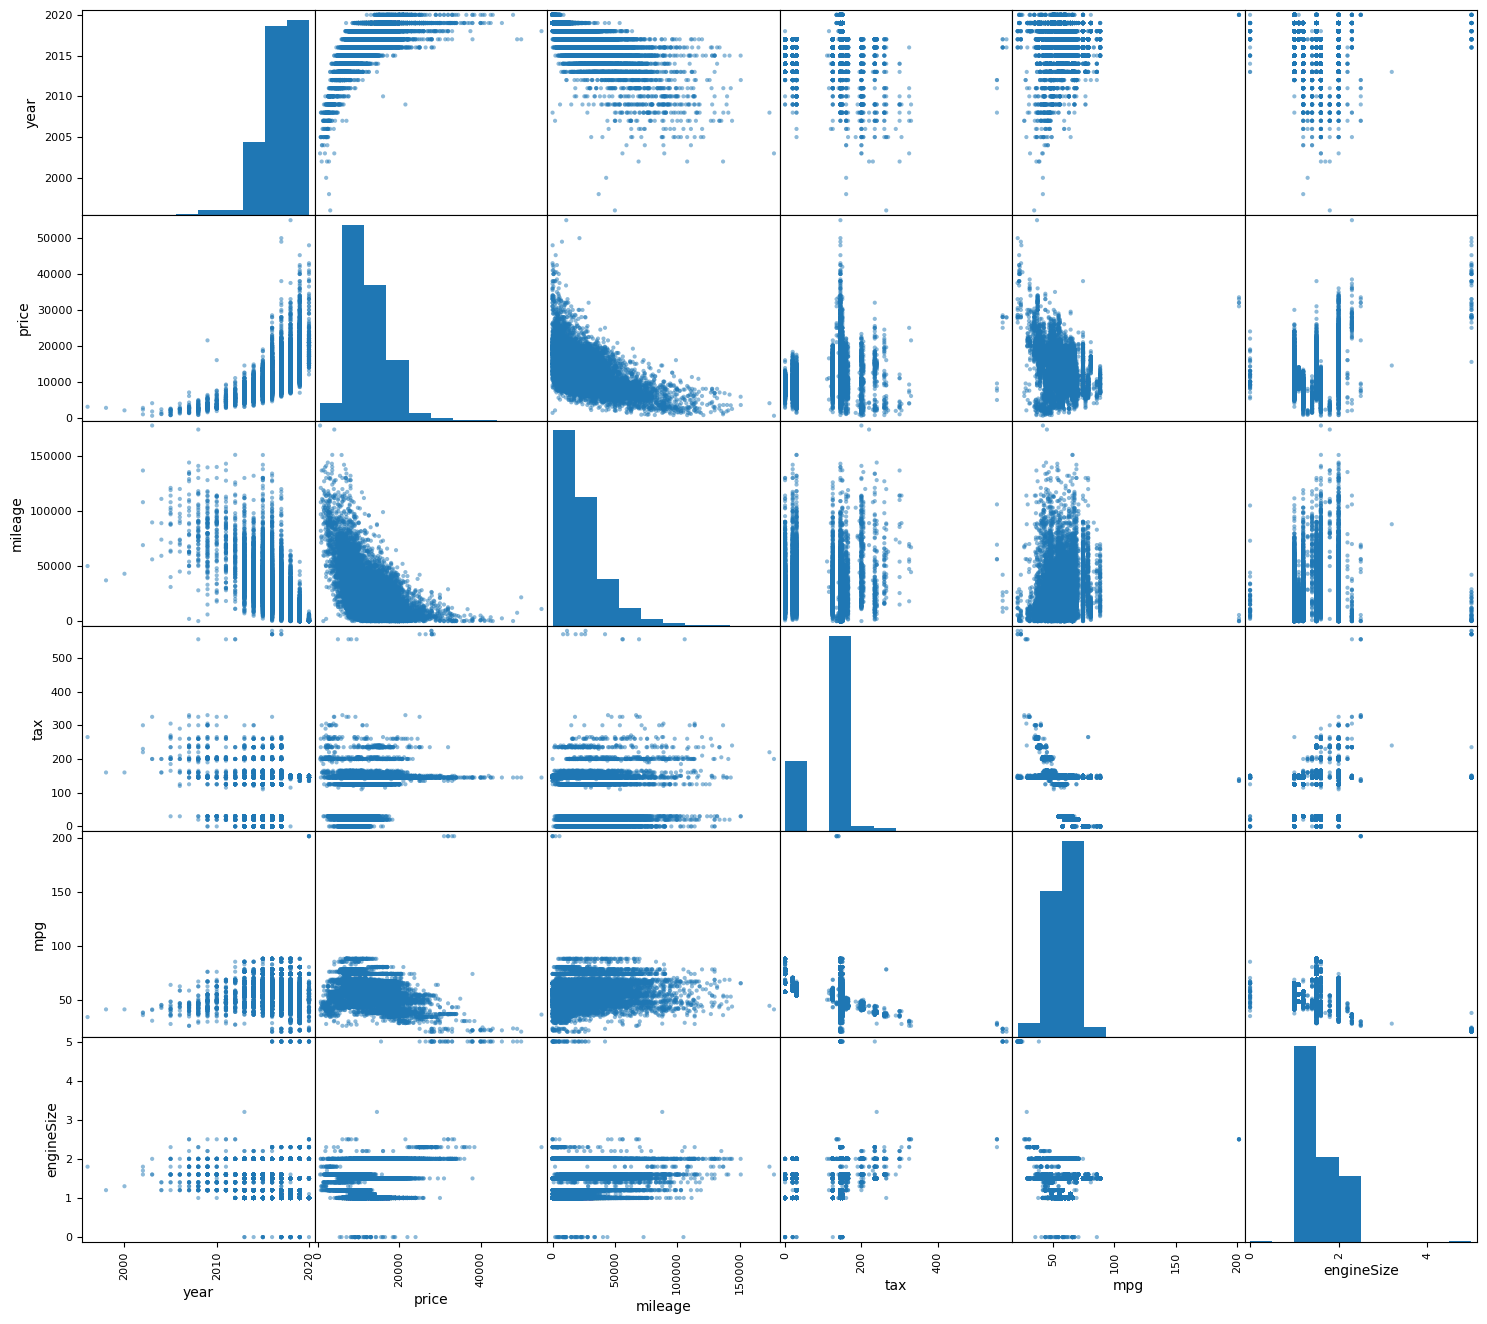

In [25]:
# Plot scatter matrix for feature engineering
featuredAttributes = [ "year", "price", "mileage","tax","mpg","engineSize"]

from pandas.plotting import scatter_matrix

scatter_matrix(df[featuredAttributes], figsize=(18,16))

In [26]:
fig = df2.corr()
fig.style.background_gradient(cmap='coolwarm')

,year,price,mileage,tax,mpg,engineSize,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,fuelType_0,fuelType_1,fuelType_2,fuelType_3,transmission_0,transmission_1,transmission_2
year,1.000000,0.645221,-0.719720,0.299141,-0.020197,-0.139506,-0.096025,-0.079550,0.085775,0.024855,-0.023326,0.038826,-0.026241,-0.033985,0.086520,0.049013,-0.070865,-0.067382,-0.023456,-0.089284,0.024516,-0.007644,0.087550,0.032766,-0.034942,0.013894
price,0.645221,1.000000,-0.530501,0.406075,-0.346409,0.411454,-0.119530,-0.088154,0.010930,0.237869,-0.333051,0.112495,0.133834,-0.034768,-0.131149,0.281903,-0.000405,0.087310,0.147314,0.198971,0.073356,0.007733,-0.204472,0.208273,-0.258417,0.140628
mileage,-0.719720,-0.530501,1.000000,-0.257813,0.117851,0.214664,0.035597,0.046389,-0.091369,-0.007712,-0.065488,0.011691,0.056207,0.027497,-0.105628,0.006480,0.196726,0.015127,0.057845,0.257396,-0.001410,-0.003731,-0.256890,-0.050277,0.059111,-0.029235
tax,0.299141,0.406075,-0.257813,1.000000,-0.502314,0.185308,-0.051228,-0.118551,0.096348,0.075658,-0.152842,-0.020457,0.059775,-0.077394,0.061129,0.196352,-0.036687,0.012231,0.077510,-0.128557,-0.007163,-0.023712,0.129606,0.154733,-0.181749,0.089726
mpg,-0.020197,-0.346409,0.117851,-0.502314,1.000000,-0.262252,-0.031390,0.027661,-0.123430,-0.124390,0.231185,0.125884,-0.051311,0.005356,-0.077869,-0.231733,0.032646,-0.145693,-0.076827,0.292824,0.107122,0.012029,-0.300875,-0.234738,0.302206,-0.174278
engineSize,-0.139506,0.411454,0.214664,0.185308,-0.262252,1.000000,-0.010589,0.023162,-0.144835,0.161984,-0.443200,0.014558,0.164776,0.015530,-0.064030,0.398106,0.215456,0.135526,0.182152,0.640927,0.054639,0.019484,-0.644839,0.164304,-0.225540,0.142175
model_0,-0.096025,-0.119530,0.035597,-0.051228,-0.031390,-0.010589,1.000000,-0.025084,-0.036799,-0.015278,-0.107438,-0.082998,-0.016087,-0.016790,-0.024627,-0.053262,-0.024358,-0.024358,-0.018343,-0.030458,-0.004979,-0.001838,0.030848,-0.003953,-0.049850,0.076223
model_1,-0.079550,-0.088154,0.046389,-0.118551,0.027661,0.023162,-0.025084,1.000000,-0.046047,-0.019118,-0.134439,-0.103856,-0.020130,-0.021010,-0.030816,-0.066648,-0.030480,-0.030480,-0.022953,0.101821,-0.006231,-0.002300,-0.101171,0.005953,-0.005821,0.001764
model_2,0.085775,0.010930,-0.091369,0.096348,-0.123430,-0.144835,-0.036799,-0.046047,1.000000,-0.028047,-0.197229,-0.152363,-0.029532,-0.030823,-0.045208,-0.097776,-0.044716,-0.044716,-0.033673,-0.103824,-0.009141,-0.003374,0.104486,-0.021427,0.002447,0.020312
model_3,0.024855,0.237869,-0.007712,0.075658,-0.124390,0.161984,-0.015278,-0.019118,-0.028047,1.000000,-0.081885,-0.063258,-0.012261,-0.012797,-0.018769,-0.040595,-0.018565,-0.018565,-0.013980,0.157166,-0.003795,-0.001401,-0.156660,0.084291,-0.155020,0.129582


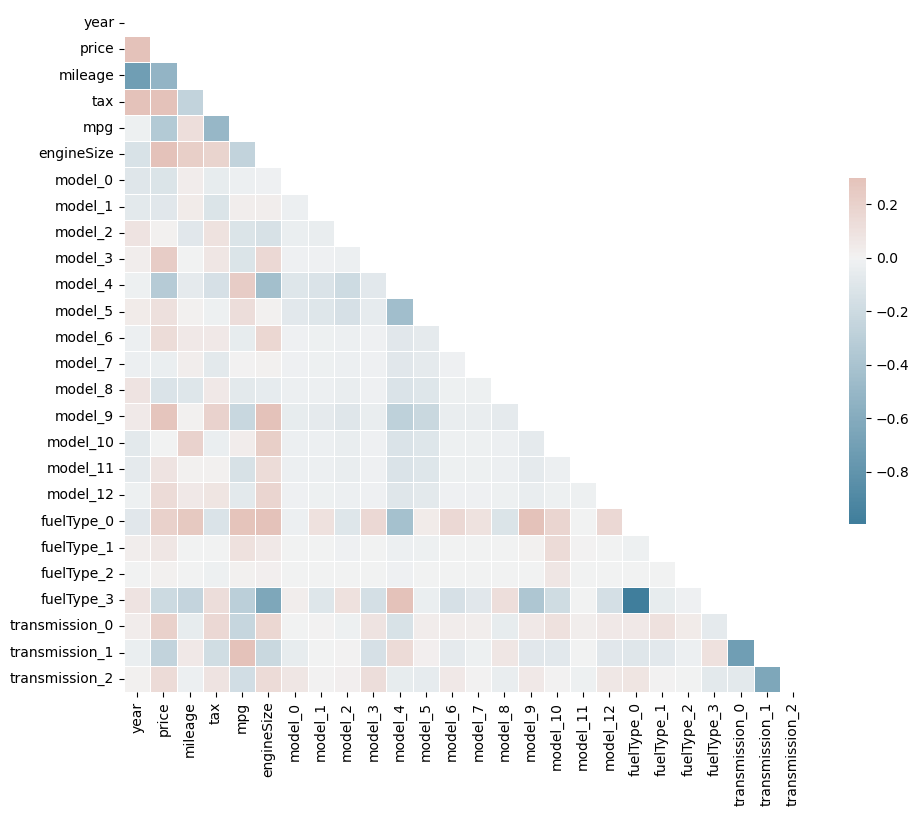

In [27]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(fig, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(fig, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

figure = ax.get_figure()    
figure.savefig('heatmap.png', dpi=400)

### 7. Identify the features and the labels which will be used in the data regression model and justify why they were selected.
The label that we will be using will be the price of the cars as it is the dependent variable that we want to predict. From the correlation function we can also pick year, mileage, tax, mpg and engineSize as the features that we will use to predict the label as they have the highest correlation.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Select the features
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Select the label
label = 'price'

# Split the data into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(df[features], df[label], test_size=0.2)

# Linear regression
lr = LinearRegression()
lr.fit(XTrain, yTrain)
yPredLR = lr.predict(XTest)

# Random forest
rf = RandomForestRegressor()
rf.fit(XTrain, yTrain)
yPredRF= rf.predict(XTest)

# III. Conclusions

### 9. Evaluate the results of the machine learning model. Use measures such as RMSE to numerically evaluate the performance of the model.

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

# R^2 value
linearRegR2 = lr.score(XTest, yTest)
randomForestR2 = rf.score(XTest, yTest)

# Root mean_squared_error
linearRegMSE = mean_squared_error(yTest, yPredLR)
linearRegRMSE = np.sqrt(linearRegMSE)

randomForestMSE = mean_squared_error(yTest, yPredRF)
randomForestRMSE = np.sqrt(randomForestMSE)

# mean_absolute_error
randomForestMAE = mean_absolute_error(yTest, yPredRF)


print("Linear Regression R^2 score: " + str(linearRegR2))
print("Random Forest R^2 score: " + str(randomForestR2))
print("Linear Regression RMSE performance: " + str(linearRegRMSE))
print("Random Forest RMSE performance: " + str(randomForestRMSE))
print("Random Forest MAE performance: " + str(randomForestMAE))


Linear Regression R^2 score: 0.7434286147036058
Random Forest R^2 score: 0.9039337351804615
Linear Regression RMSE performance: 2326.0681528148116
Random Forest RMSE performance: 1423.3240189337082
Random Forest MAE performance: 998.3410418944397


R^2 score is a measure of how well the model fits the data, it tells us how much the total variation is explained by the models. From the R^2 scores, we can deduce that using random forest is a better fit model for the dataset (0.904 3sf) compared to linear regression (0.743 3sf).

We use RMSE and not MAE for linear regression as it penalises large errors more than small errors, the value of RSME we get from linear regression is 2410 (rounded up), as a fair mean of comparing of random forest model, we also calculates its RSME which we get 1472 (rounded up), which shows that forest regression performed better. The values means the average difference between the predicted values and actual values. In our case, it is the average difference in prices of the predicted used car value as compared to its actual values.

We use MAE for random forest model because the model is more robust and can handle non-linear relationships and is less sensitive to outliers.

### 10. Provide a reflective evaluation of the developed project in light of the obtained results.

The project's approach for used car datasets can be easily reproduced for other similar domain-specific area such as other used vehicle datasets or for other car brands and other regional markets. The exploratory data analysis can give valuable insights for how used car features relates to its prices. Visualisation for features relationships can give a better idea on how different car's features can affect the price of the used car as well. An accurate predictive model would help stakeholders be it showrooms, individuals, or other related markets regarding cars to make better decision on car pricings standards. By using different machine learning models in our project would help researchers understand or improve their approach for their machine learning projects. By using different programming languages, development environments, ML libraries and ML
algorithms, however, there will be both benefits and drawbacks. 
The benefit can be a better performance on the predictive models as other approaches can give access to a higher level of programming that make the model more efficient and more advanced algorithm that can better predict the used car prices. However, it can increase its complexity as there might not exist a library that syncs well with the approach this project used and therefore would need further coding required. It may also have a higher cost as some approaches require a paid license and/or subscription.